# Code to generate function commands for MSC ADAMS
#### This code gives an output expression that can be used as a **IF** function in MSC ADAMS software package.

In [1]:
# Importing required libraries
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
def IF_ADAMS(x, y, vals):
    '''
    Enter the x, y and vals values to generate a curve that may be imparted on a MOTION or FORCE.
    x: x coodinates
    y: y coordinates
    vals: The actual values of motion in mm or degrees, or radians
    
    SAMPLE INPUT 1: Rotation
    u, v: x, y coordinates fo curve
    u = [i for i in np.arange(0, 3.5, 0.5)]
    v = [0, 1, 0.764, 0.764, 0.764, 0, 0.764]
    val = '85d'
    IF_ADAMS(a, b, val)
    
    SAMPLE INPUT 2: Translation
    u = [0.0, 1.0, 1.5, 2.0, 3.0]
    v = [0.0, 0.0, 1.0, 0.0, 0.0]
    val = '31.114'
    IF_ADAMS(u, v, val)
    
    NOTE:
    Please enter the maximum value for the input 'vals', i.e. if you need to move something by 100mm or 100 degrees, then give, 100 or 100d as the values for 'val'
    Adjust the values of the y to get into different output values of the movement
    '''
    for i in range(len(x) - 1):
        x_new = [x[i], x[i + 1]]
        y_new = [y[i], y[i + 1]]

        l = np.polyfit(x_new, y_new, 1)

        func = np.poly1d(l, variable = 'time')
        if len(list(func.coef)) < 2:        
            func_text = '0'
        else:
            func_text = str(round(list(func.coef)[0], 3)) + ' * time + ' + str(round(list(func.coef)[1], 3))
        
        print(func)
        print(list(zip(x_new, y_new)))

        plt.scatter(x_new, y_new)
        plt.plot(x_new, y_new)
            
        if i == 0:
            to_adams = 'IF(time - ' + str(x[i + 1]) + ':' + ' <VALUE>*(' + func_text + '),' + ' <VALUE>*(' + func_text + '),'
        elif i > 0 & i < (len(x) - 1):
            to_adams = to_adams + ' IF(time - ' + str(x[i + 1]) + ':' + ' <VALUE>*(' + func_text + '),' + ' <VALUE>*(' + func_text + '),'
        elif i == (len(x) - 1):
            to_adams = to_adams + ' <VALUE>*(' + func_text + ')'
    
    to_adams = to_adams + ' <VALUE>*(' + func_text + ')'
    to_adams = to_adams + (')' * (len(x) - 1))
    to_adams = to_adams.replace('<VALUE>', vals)
    
    return to_adams

 
2 time + 1.582e-17
[(0.0, 0), (0.5, 1)]
 
-0.472 time + 1.236
[(0.5, 1), (1.0, 0.764)]
 
1.853e-16 time + 0.764
[(1.0, 0.764), (1.5, 0.764)]
 
2.561e-16 time + 0.764
[(1.5, 0.764), (2.0, 0.764)]
 
-1.528 time + 3.82
[(2.0, 0.764), (2.5, 0)]
 
1.528 time - 3.82
[(2.5, 0), (3.0, 0.764)]


'IF(time - 0.5: 85d*(2.0 * time + 0.0), 85d*(2.0 * time + 0.0), IF(time - 1.0: 85d*(-0.472 * time + 1.236), 85d*(-0.472 * time + 1.236), IF(time - 1.5: 85d*(0.0 * time + 0.764), 85d*(0.0 * time + 0.764), IF(time - 2.0: 85d*(0.0 * time + 0.764), 85d*(0.0 * time + 0.764), IF(time - 2.5: 85d*(-1.528 * time + 3.82), 85d*(-1.528 * time + 3.82), IF(time - 3.0: 85d*(1.528 * time + -3.82), 85d*(1.528 * time + -3.82), 85d*(1.528 * time + -3.82)))))))'

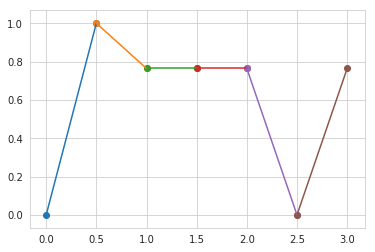

In [3]:
a = [i for i in np.arange(0, 3.5, 0.5)]
b = [0, 1, 0.764, 0.764, 0.764, 0, 0.764]
val = '85d'

text = IF_ADAMS(a, b, val)
text

 
0
[(0.0, 0.0), (1.0, 0.0)]
 
2 time - 2
[(1.0, 0.0), (1.5, 1.0)]
 
-2 time + 4
[(1.5, 1.0), (2.0, 0.0)]
 
0
[(2.0, 0.0), (3.0, 0.0)]


'IF(time - 1.0: 31.114*(0), 31.114*(0), IF(time - 1.5: 31.114*(2.0 * time + -2.0), 31.114*(2.0 * time + -2.0), IF(time - 2.0: 31.114*(-2.0 * time + 4.0), 31.114*(-2.0 * time + 4.0), IF(time - 3.0: 31.114*(0), 31.114*(0), 31.114*(0)))))'

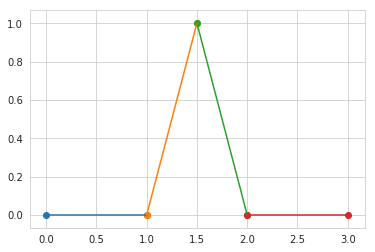

In [4]:
plate_a = [0.0, 1.0, 1.5, 2.0, 3.0]
plate_b = [0.0, 0.0, 1.0, 0.0, 0.0]
plate_val = '31.114'

IF_ADAMS(plate_a, plate_b, plate_val)